In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
world_refugee_population = pd.read_excel('world_refugee_population.xls')
world_refugee_population.head()

,country_name,Country Code,region,income_group,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Latin America & Caribbean,High income,Refugee population by country or territory of ...,SM.POP.REFG,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,Low income,Refugee population by country or territory of ...,SM.POP.REFG,NaN,NaN,NaN,NaN,...,3011.0,16184.0,16861.0,300421.0,257553.0,59770.0,75927.0,72228.0,72227.0,72278.0
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,Refugee population by country or territory of ...,SM.POP.REFG,NaN,NaN,NaN,NaN,...,16212.0,23401.0,23771.0,15468.0,15547.0,15547.0,41119.0,39856.0,25793.0,25806.0
3,Albania,ALB,Europe & Central Asia,Upper middle income,Refugee population by country or territory of ...,SM.POP.REFG,NaN,NaN,NaN,NaN,...,79.0,84.0,96.0,111.0,109.0,141.0,124.0,132.0,120.0,115.0
4,Andorra,AND,Europe & Central Asia,High income,Refugee population by country or territory of ...,SM.POP.REFG,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
world_refugee_population.drop(columns = ['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972',
                                 '1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984',
                                 '1985','1986','1987','1988','1989','1990'], axis=1, inplace=True)
world_refugee_population.set_index('country_name', inplace=True)
world_refugee_population.head(2)

,Country Code,region,income_group,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country_name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Latin America & Caribbean,High income,Refugee population by country or territory of ...,SM.POP.REFG,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,South Asia,Low income,Refugee population by country or territory of ...,SM.POP.REFG,38.0,60025.0,32131.0,19134.0,19605.0,...,3011.0,16184.0,16861.0,300421.0,257553.0,59770.0,75927.0,72228.0,72227.0,72278.0


In [4]:
world_refugee_population = world_refugee_population.dropna()

world_refugee_population.sort_values(['2020'], ascending=False, axis=0, inplace=True)
world_refugee_population.head(2)

,Country Code,region,income_group,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country_name,,,,,,,,,,,,,,,,,,,,,
Turkey,TUR,Europe & Central Asia,Upper middle income,Refugee population by country or territory of ...,SM.POP.REFG,30462.0,28477.0,23267.0,24927.0,12841.0,...,14457.0,267063.0,609931.0,1587365.0,2541348.0,2869419.0,3480350.0,3681688.0,3579531.0,3652362.0
Jordan,JOR,Middle East & North Africa,Upper middle income,Refugee population by country or territory of ...,SM.POP.REFG,989647.0,1042393.0,1140664.0,1240385.0,1329466.0,...,2430580.0,2337341.0,2712877.0,2771492.0,2808343.0,2860679.0,2897751.0,2957877.0,2966079.0,3009517.0


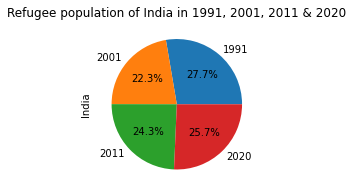

In [5]:
years = ['1991','2001','2011','2020']

fig = plt.figure(figsize = (10,3),)
world_refugee_population.loc['India', years].plot(kind = 'pie',
                                                 autopct='%1.1f%%')
plt.title('Refugee population of India in 1991, 2001, 2011 & 2020')
plt.show()

In [6]:
years = list(map(str, range(1991, 2020)))
world_refugee_population['Total'] = world_refugee_population.sum(axis=1)

income_group_wise = world_refugee_population.groupby('income_group', axis=0).sum()
print(type(world_refugee_population.groupby('income_group', axis=0)))

income_group_wise

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
income_group,,,,,,,,,,,,,,,,,,,,,
High income,2301571.0,2819124.0,3095838.0,3163801.0,3030758.0,3070569.0,2802031.0,2594189.0,2618684.0,2497366.0,...,1881705.0,1522365.0,1643724.0,1881294.0,2418441.0,2852926.0,3104489.0,3359570.0,3431574.0,76510769.0
Low income,4130231.0,4017900.0,4255611.0,4640259.0,4163760.0,3026884.0,2209463.0,2192491.0,2259036.0,2223586.0,...,2288879.0,2130189.0,2699942.0,3171720.0,3929750.0,5027449.0,5014908.0,5024375.0,5071230.0,90934921.0
Lower middle income,10400430.0,9326301.0,7850474.0,7294291.0,6925954.0,6517840.0,6432493.0,6296669.0,6460317.0,7439590.0,...,6201618.0,6282049.0,6496277.0,6775197.0,6651532.0,7436172.0,7527250.0,7570506.0,7538797.0,205320901.0
Upper middle income,2542569.0,3114506.0,2599119.0,2668088.0,2942420.0,2913466.0,3000296.0,3015073.0,3062512.0,3124334.0,...,3999476.0,5645275.0,6992335.0,7861094.0,8173574.0,8819265.0,9075424.0,8959818.0,9078840.0,134596172.0


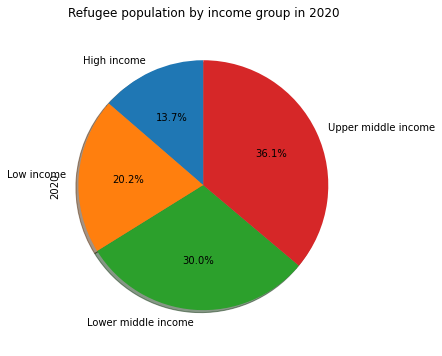

In [7]:
income_group_wise['2020'].plot(kind='pie',
                            figsize=(5,6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True
                            )

plt.title('Refugee population by income group in 2020')
plt.axis('equal')
plt.show()

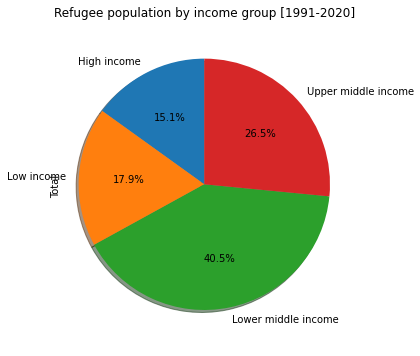

In [8]:
income_group_wise['Total'].plot(kind='pie',
                            figsize=(5,6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True
                            )

plt.title('Refugee population by income group [1991-2020]')
plt.axis('equal')
plt.show()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


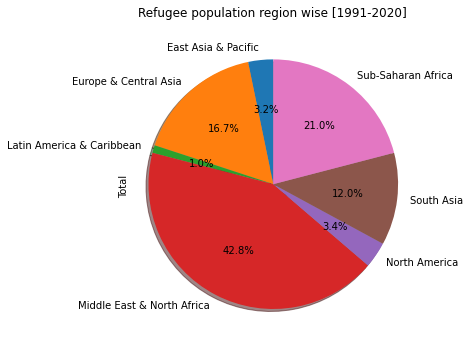

In [9]:
region_wise = world_refugee_population.groupby('region', axis=0).sum()
print(type(world_refugee_population.groupby('region', axis=0)))

region_wise['Total'].plot(kind='pie',
                            figsize=(5,6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True
                            )

plt.title('Refugee population region wise [1991-2020]')
plt.axis('equal')
plt.show()